In [2]:
import numpy as np
import pandas as pd

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [17]:
df = pd.read_csv('140325_LoL_champion_data.csv')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  172 non-null    float64
 1   apiname             172 non-null    object 
 2   title               172 non-null    object 
 3   difficulty          172 non-null    int64  
 4   herotype            172 non-null    object 
 5   alttype             144 non-null    object 
 6   resource            167 non-null    object 
 7   stats               172 non-null    object 
 8   rangetype           172 non-null    object 
 9   role                172 non-null    object 
 10  client_positions    172 non-null    object 
 11  external_positions  172 non-null    object 
 12  damage              172 non-null    int64  
 13  toughness           172 non-null    int64  
 14  control             172 non-null    int64  
 15  mobility            172 non-null    int64  
 16  utility 

In [33]:
df.drop(columns=['date', 'patch', 'changes'], inplace=True)

In [20]:
names = np.array(df[['Unnamed: 0', 'apiname']])

In [21]:
df.drop(columns='Unnamed: 0', inplace=True)

In [35]:
df.head()

,id,apiname,title,difficulty,herotype,alttype,resource,stats,rangetype,role,...,adaptivetype,be,rp,skill_i,skill_q,skill_w,skill_e,skill_r,skills,fullname
0,266.0,Aatrox,the Darkin Blade,2,Fighter,Tank,Blood Well,"{'hp_base': 650, 'hp_lvl': 114, 'mp_base': 0, ...",Melee,{'Juggernaut'},...,Physical,2400,880,{1: 'Deathbringer Stance'},"{1: 'The Darkin Blade', 2: 'The Darkin Blade 3'}",{1: 'Infernal Chains'},{1: 'Umbral Dash'},{1: 'World Ender'},"{1: 'Deathbringer Stance', 2: 'The Darkin Blad...",NaN
1,103.0,Ahri,the Nine-Tailed Fox,2,Mage,Assassin,Mana,"{'hp_base': 590, 'hp_lvl': 104, 'mp_base': 418...",Ranged,{'Burst'},...,Magic,1575,790,{1: 'Essence Theft'},{1: 'Orb of Deception'},{1: 'Fox-Fire'},{1: 'Charm'},{1: 'Spirit Rush'},"{1: 'Essence Theft', 2: 'Orb of Deception', 3:...",NaN
2,84.0,Akali,the Rogue Assassin,2,Assassin,NaN,Energy,"{'hp_base': 600, 'hp_lvl': 119, 'mp_base': 200...",Melee,{'Assassin'},...,Physical,1575,790,"{1: ""Assassin's Mark""}",{1: 'Five Point Strike'},{1: 'Twilight Shroud'},{1: 'Shuriken Flip'},{1: 'Perfect Execution'},"{1: ""Assassin's Mark"", 2: 'Five Point Strike',...",Akali Jhomen Tethi
3,166.0,Akshan,the Rogue Sentinel,3,Marksman,Assassin,Mana,"{'hp_base': 630, 'hp_lvl': 107, 'mp_base': 350...",Ranged,"{'Assassin', 'Marksman'}",...,Physical,2400,880,{1: 'Dirty Fighting'},{1: 'Avengerang'},{1: 'Going Rogue'},{1: 'Heroic Swing'},{1: 'Comeuppance'},"{1: 'Dirty Fighting', 2: 'Avengerang', 3: 'Goi...",NaN
4,12.0,Alistar,the Minotaur,1,Tank,Support,Mana,"{'hp_base': 685, 'hp_lvl': 120, 'mp_base': 350...",Melee,{'Vanguard'},...,Magic,675,585,{1: 'Triumphant Roar'},{1: 'Pulverize'},{1: 'Headbutt'},{1: 'Trample'},{1: 'Unbreakable Will'},"{1: 'Triumphant Roar', 2: 'Pulverize', 3: 'Hea...",NaN


In [36]:
df['role'].value_counts()

role
{'Marksman'}                  21
{'Vanguard'}                  16
{'Diver'}                     15
{'Juggernaut'}                14
{'Specialist'}                14
{'Skirmisher'}                14
{'Assassin'}                  13
{'Battlemage'}                11
{'Burst'}                     11
{'Enchanter'}                  8
{'Catcher'}                    7
{'Artillery'}                  6
{'Warden'}                     5
{'Diver', 'Assassin'}          2
{'Burst', 'Enchanter'}         2
{'Assassin', 'Marksman'}       1
{'Burst', 'Assassin'}          1
{'Diver', 'Skirmisher'}        1
{'Catcher', 'Marksman'}        1
{'Warden', 'Skirmisher'}       1
{'Burst', 'Artillery'}         1
{'Burst', 'Catcher'}           1
{'Catcher', 'Assassin'}        1
{'Enchanter', 'Marksman'}      1
{'Burst', 'Skirmisher'}        1
{'Enchanter', 'Warden'}        1
{'Artillery', 'Marksman'}      1
{'Skirmisher', 'Assassin'}     1
Name: count, dtype: int64

In [39]:
df['rangetype'].value_counts()

rangetype
Melee     91
Ranged    81
Name: count, dtype: int64

<Axes: xlabel='be', ylabel='rp'>

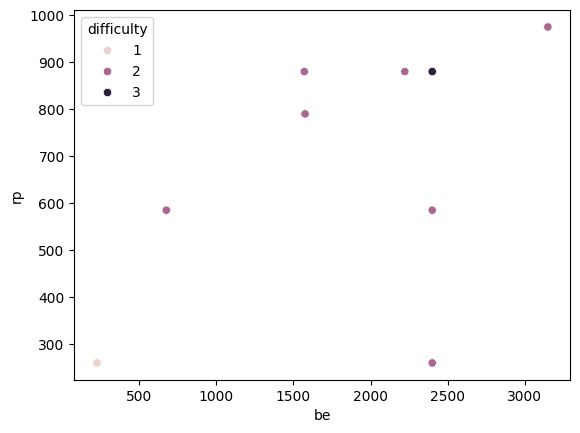

In [45]:
sns.scatterplot(data=df, x='be', y='rp', hue='difficulty')

In [46]:
df['alttype'].value_counts()

alttype
Mage        38
Assassin    31
Support     28
Tank        25
Fighter     17
Marksman     5
Name: count, dtype: int64